In [0]:
# Import necessary modules and prepare the data

%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [0]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [0]:
rawBostonData = rawBostonData.dropna()
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'AvgNo.RoomsPerDwelling',
 'AGE':'ProptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10 
test_data_size = 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

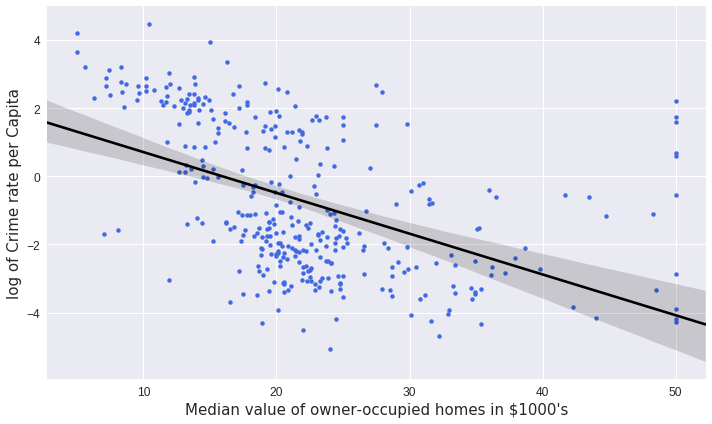

In [6]:
# Use the seaborn function regplot to create a log-linear plot and fit a regression line through it

fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax,\
color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15,\
fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's",\
fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()